##  Import and examine data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import os
# os.path.abspath("/Users/regi/Flatiron/mod4_project/data/RISKFACTORSANDACCESSTOCARE.csv")

In [3]:
risk_df = pd.read_csv('/Users/stephaniekendall/Desktop/Flatiron/projects/mod4_project/data/RISKFACTORSANDACCESSTOCARE.csv')

In [4]:
risk_df.head(3)

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,...,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2


In [5]:
risk_df = risk_df[risk_df.columns.drop(list(risk_df.filter(regex='Max')))]
risk_df = risk_df[risk_df.columns.drop(list(risk_df.filter(regex='Min')))]

In [6]:
risk_df.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes',
       'Uninsured', 'Elderly_Medicare', 'Disabled_Medicare',
       'Prim_Care_Phys_Rate', 'Dentist_Rate', 'Community_Health_Center_Ind',
       'HPSA_Ind'],
      dtype='object')

In [7]:
risk_df.sample(5)

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
768,18,147,Spencer,Indiana,IN,38,24.4,85.1,24.9,-1111.1,26.7,5.0,2131,2708,433,29.2,19.5,2,2
1656,31,9,Blaine,Nebraska,NE,82,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,166,96,12,0.0,0.0,2,1
313,9,15,Windham,Connecticut,CT,12,24.9,71.2,23.5,29.8,24.2,7.4,11524,13341,2836,57.8,31.9,1,2
2626,48,211,Hemphill,Texas,TX,78,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,405,429,35,87.7,0.0,2,2
2933,51,683,Manassas City,Virginia,VA,27,13.2,-1111.1,16.6,19.7,21.3,10.3,4675,5452,1030,149.1,53.2,2,2


In [8]:
round(risk_df.describe(), 2)

,State_FIPS_Code,County_FIPS_Code,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
count,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00
mean,30.30,103.72,44.70,-312.13,-389.74,-307.28,-559.87,-292.49,-142.52,12644.81,10878.69,1858.45,57.56,31.45,1.55,1.76
std,15.13,108.00,25.12,520.27,581.55,516.25,568.62,508.39,381.65,54604.78,31387.57,4698.55,44.79,45.61,0.50,0.43
min,1.00,1.00,1.00,-1111.10,-1111.10,-1111.10,-1111.10,-1111.10,-1111.10,-2222.00,-2222.00,-2222.00,0.00,-2222.20,1.00,1.00
25%,18.00,35.00,23.00,-1111.10,-1111.10,-1111.10,-1111.10,-1111.10,5.00,1549.00,1607.00,275.00,30.50,18.70,1.00,2.00
50%,29.00,79.00,44.00,22.60,74.00,21.70,-1111.10,20.30,7.00,3426.00,3448.00,690.00,50.60,30.00,2.00,2.00
75%,45.00,133.00,66.00,28.60,80.20,25.80,26.10,25.10,9.10,8116.00,8053.00,1667.00,74.70,43.30,2.00,2.00
max,56.00,840.00,88.00,52.40,96.40,42.60,47.10,46.20,20.80,2167891.00,911590.00,118190.00,581.20,377.90,2.00,2.00


In [9]:
# NEW
# columns with placeholder values (-1111.1)
miss_data_1 = ['No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes']
# columns with placeholder values (-2222.00)
miss_data_2 = ['Uninsured']
# columns we dont need
drop_cols = ['Community_Health_Center_Ind', 'HPSA_Ind', 'Elderly_Medicare', 'Disabled_Medicare', 'Prim_Care_Phys_Rate', 'Dentist_Rate']

In [10]:
def drop_n_plot(df, list_of_cols, value):
    for col in list_of_cols:
        dropped = df[col].loc[(df[col] != value)]
        dropped.hist(bins=20)
        plt.title(col)
        plt.show()
        print(f'{col} values dropped: {df[col].loc[(df[col] == value)].count()}')
        print(f'Median is {dropped.median()}')
        print(f'Mean is {dropped.mean()}')

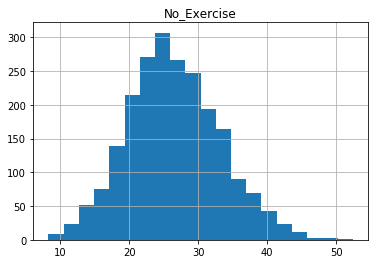

No_Exercise values dropped: 935
Median is 26.0
Mean is 26.50838621940164


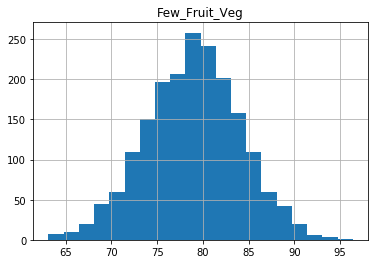

Few_Fruit_Veg values dropped: 1237
Median is 79.0
Mean is 78.92316176470604


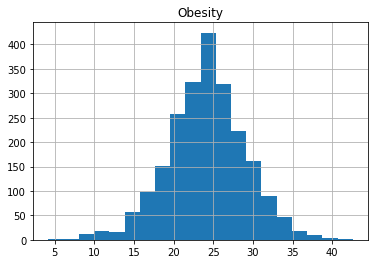

Obesity values dropped: 917
Median is 24.3
Mean is 24.145188848920824


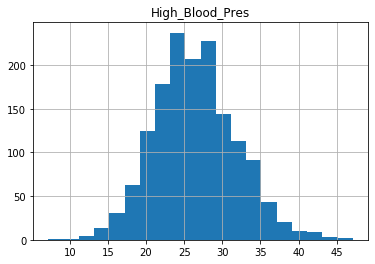

High_Blood_Pres values dropped: 1619
Median is 26.2
Mean is 26.48094612352162


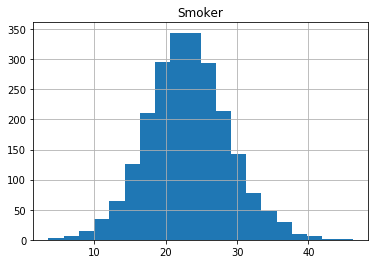

Smoker values dropped: 874
Median is 23.0
Mean is 23.112880458756088


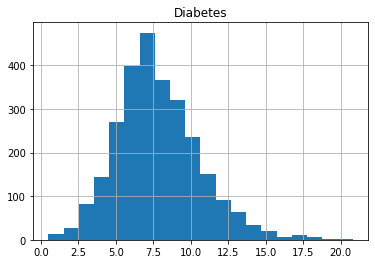

Diabetes values dropped: 422
Median is 7.5
Mean is 7.810187568959173


In [11]:
drop_n_plot(risk_df, miss_data_1, -1111.1)

In [12]:
# Replace the missing values with means
def replace_with_mean(df, col_list, value):
    for col in col_list:
        miss_count = df[col].loc[(df[col] == value)].count()
        dropped = df[col].loc[(df[col] != value)]
        mean = dropped.mean()
        df[col] = df[col].apply(lambda x: mean if x == value else x)
        print(f'Replaced {miss_count} values of {value} in {col} with mean {mean}')

In [13]:
replace_with_mean(risk_df, miss_data_1, -1111.1)

Replaced 935 values of -1111.1 in No_Exercise with mean 26.50838621940164
Replaced 1237 values of -1111.1 in Few_Fruit_Veg with mean 78.92316176470604
Replaced 917 values of -1111.1 in Obesity with mean 24.145188848920824
Replaced 1619 values of -1111.1 in High_Blood_Pres with mean 26.48094612352162
Replaced 874 values of -1111.1 in Smoker with mean 23.112880458756088
Replaced 422 values of -1111.1 in Diabetes with mean 7.810187568959173


In [14]:
replace_with_mean(risk_df, miss_data_2, -2222.0)

Replaced 3 values of -2222.0 in Uninsured with mean 12659.02039515615


In [15]:
risk_df.drop(columns=drop_cols, inplace=True)

In [16]:
risk_df.shape

(3141, 13)

In [17]:
round(risk_df.describe(), 2)

,State_FIPS_Code,County_FIPS_Code,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
count,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00
mean,30.30,103.72,44.70,26.51,78.92,24.15,26.48,23.11,7.81,12659.02
std,15.13,108.00,25.12,5.61,4.02,4.13,3.78,4.87,2.57,54602.84
min,1.00,1.00,1.00,8.30,63.10,4.20,7.20,3.60,0.50,11.00
25%,18.00,35.00,23.00,23.80,77.90,22.50,26.40,20.90,6.20,1551.00
50%,29.00,79.00,44.00,26.51,78.92,24.15,26.48,23.11,7.81,3434.00
75%,45.00,133.00,66.00,28.60,80.20,25.80,26.48,25.10,9.10,8126.00
max,56.00,840.00,88.00,52.40,96.40,42.60,47.10,46.20,20.80,2167891.00


In [18]:
risk_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,1,1,Autauga,Alabama,AL,29,27.800000,78.600000,24.500000,29.100000,26.60000,14.2,5690.0
1,1,3,Baldwin,Alabama,AL,16,27.200000,76.200000,23.600000,30.500000,24.60000,7.2,19798.0
2,1,5,Barbour,Alabama,AL,51,26.508386,78.923162,25.600000,26.480946,17.70000,6.6,5126.0
3,1,7,Bibb,Alabama,AL,42,26.508386,86.600000,24.145189,26.480946,23.11288,13.1,3315.0
4,1,9,Blount,Alabama,AL,28,33.500000,74.600000,24.200000,26.480946,23.60000,8.4,8131.0


In [19]:
def make_column_hists(df, fig_columns=2, select_columns=None, bin_number=10, figure_size=[14,14]):
    #if a list of columns is passed use that, otherwise use all df columns
    if select_columns is not None:
        column_list = select_columns
    else:
        column_list = df.columns
    # Set matplotlib style
    plt.style.use('ggplot')
    # get number of rows and columns for the figure grid of plots
    df_cols_len = len(column_list)
    fig_rows = df_cols_len // fig_columns
    if df_cols_len % fig_columns != 0:
        fig_rows += 1
    # create fig and subplots
    fig, ax = plt.subplots(nrows=fig_rows, ncols=fig_columns, figsize=figure_size, dpi=100,sharex=False, sharey=False)
    # create a list of subpolot axes
    list_of_axes = []
    if (fig_rows == 1) | (fig_columns == 1):
        for n in range(max([fig_rows, fig_columns])):
            list_of_axes.append(ax[n])
    else:
        for n in range(fig_rows):
            for i in range(fig_columns):
                list_of_axes.append(ax[n,i])
    # plot a histogram on each axes
    for n in range(df_cols_len):
        list_of_axes[n].hist(df[column_list[n]], bins=bin_number)
        list_of_axes[n].set_title(f'{column_list[n]}, dtype:{np.dtype(df[column_list[n]]).name}')


In [20]:
# make_column_hists(risk_df, figure_size = [12, 36])

In [23]:
#save cleaned df as csv

cleaned_risk = risk_df.to_csv('/Users/stephaniekendall/Desktop/Flatiron/projects/mod4_project/cleaned_data/cleaned_risk.csv',index=False)